In [1]:
import pandas as pd
import numpy as np;
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/content/sample_data/googleplaystore.csv');
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


The dataset contain Google playstore app reviews. This is based on the users reviews for around 10000 samples. The data set contains 13 columns like app name, type, rating, reviews etc...

PREPROCESSING

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [ ]:
df["Installs"] = df["Installs"].map(lambda x: str(x).replace('+',''))
df["Installs"] = df["Installs"].map(lambda x: str(x).replace(',',''))
df["Size"] = df["Size"].map(lambda x: str(x).replace('M',''))
df.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
df=df.dropna(subset=['Type'])

In [ ]:
df.drop(df.loc[df['Type']=='0'].index, inplace=True)

In [ ]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df['Installs'] = pd.to_numeric(df['Installs'],errors='coerce')
df['Installs'].describe()


count    1.083900e+04
mean     1.546577e+07
std      8.503315e+07
min      0.000000e+00
25%      3.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [ ]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')
df['Reviews'].describe()


count    1.083900e+04
mean     4.441939e+05
std      2.927893e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.478300e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [ ]:
df['Rating'] = pd.to_numeric(df['Rating'],errors='coerce')
df['Rating'].describe()


count    10839.000000
mean         4.191972
std          0.478929
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [ ]:
df["Type"].unique()


array(['Free', 'Paid'], dtype=object)

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [ ]:
df["Installs"] = df["Installs"].map(lambda x: str(x).replace('+',''))
df["Installs"] = df["Installs"].map(lambda x: str(x).replace(',',''))
df["Size"] = df["Size"].map(lambda x: str(x).replace('M',''))
df.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
df=df.dropna(subset=['Type'])

In [ ]:
df.drop(df.loc[df['Type']=='0'].index, inplace=True)

In [ ]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df['Installs'] = pd.to_numeric(df['Installs'],errors='coerce')
df['Installs'].describe()


count    1.083900e+04
mean     1.546577e+07
std      8.503315e+07
min      0.000000e+00
25%      3.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [ ]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')
df['Reviews'].describe()


count    1.083900e+04
mean     4.441939e+05
std      2.927893e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.478300e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [ ]:
df['Rating'] = pd.to_numeric(df['Rating'],errors='coerce')
df['Rating'].describe()


count    10839.000000
mean         4.191972
std          0.478929
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [ ]:
df["Type"].unique()


array(['Free', 'Paid'], dtype=object)

In [ ]:
df["Type"] = df["Type"].map(lambda x: str(x).replace('Free','0'))
df["Type"] = df["Type"].map(lambda x: str(x).replace('Paid','1'))
df["Type"].unique()
df.fillna(0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19,10000,0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14,500000,0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25,50000000,0,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,0,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53,5000,0,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,0,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5,1000,0,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,1000,0,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING'], dtype=object)

In [ ]:
df["Category"] = df["Category"].map(lambda x: str(x).replace('ART_AND_DESIGN','0'))
df["Category"] = df["Category"].map(lambda x: str(x).replace('AUTO_AND_VEHICLES','1'))
df["Category"] = df["Category"].map(lambda x: str(x).replace('BEAUTY','2'))
df["Category"] = df["Category"].map(lambda x: str(x).replace('BOOKS_AND_REFERENCE','3'))
df["Category"] = df["Category"].map(lambda x: str(x).replace('BUSINESS','4'))
df["Category"] = df["Category"].map(lambda x: str(x).replace('COMICS','5'))
df["Category"] = df["Category"].map(lambda x: str(x).replace('COMMUNICATION','6'))
df["Category"] = df["Category"].map(lambda x: str(x).replace('DATING','7'))

In [ ]:
df['Category'].unique()

array(['0', '1', '2', '3', '4', '5', '6', '7'], dtype=object)

In [ ]:
df_cpy=df.drop(['Android Ver','Current Ver','Price','Content Rating','Genres','Last Updated'],axis=1)

In [ ]:
df_cpy.isnull().sum()

App         0
Category    0
Rating      0
Reviews     0
Size        0
Installs    0
Type        0
dtype: int64

In [ ]:
df_cpy.drop(df_cpy.loc[df['Size']=='Varies with device'].index, inplace=True)

In [ ]:
df["Size"] = df["Size"].map(lambda x: str(x).replace('k',' '))

In [ ]:
df_cpy.drop(df_cpy.loc[df['Size']=='201k'].index, inplace=True)
df_cpy.drop(df_cpy.loc[df['Size']=='23k'].index, inplace=True)
df_cpy.drop(df_cpy.loc[df['Size']=='79k'].index, inplace=True)
df_cpy.drop(df_cpy.loc[df['Size']=='118k'].index, inplace=True)
df_cpy.drop(df_cpy.loc[df['Size']=='695k'].index, inplace=True)
df_cpy.drop(df_cpy.loc[df['Size']=='18k'].index, inplace=True)

In [ ]:

df_cpy.drop(df_cpy.loc[df['Size']=='695k'].index, inplace=True)

In [ ]:
df_cpy['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', '9.4',
       '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35', '54',
       '201k', '3.6', '5.7', '8.6', '2.4', '27', '2.5', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22', '7.4',
       '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9', '13', '73',
       '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3', '9.1', '55',
       '23k', '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3',
       '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66',
       '79k', '8.4', '118k', '44', '695k', '1.6', '6.2', '18k', '53'],
      dtype=object)

In [ ]:
df_cpy['Type'].unique()

array(['0', '1'], dtype=object)

In [ ]:
df["Type"] = df["Type"].map(lambda x: str(x).replace('Free','0'))
df["Type"] = df["Type"].map(lambda x: str(x).replace('Paid','1'))
df["Type"].unique()
df.fillna(0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19,10000,0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14,500000,0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25,50000000,0,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,0,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53,5000,0,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,0,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5,1000,0,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,1000,0,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


KNN

Now  we will apply KNN for the data set. We select 5 atributes and the Type atribute as target atribute

In [ ]:
features =['Category','Rating','Reviews','Installs','Size']
x=df_cpy[features]
y= df_cpy['Type']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=1)


We split the dataset into train and test data set using the train_test_split method in 80:20 ratio

In [ ]:
len(x_test)
len(y_test)

70

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4 , metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [ ]:
knn.score(x_test,y_test)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
y_predict=knn.predict(x_test)
cm=confusion_matrix(y_test,y_predict)
cm

array([[69,  0],
       [ 0,  1]])

This is the confuion matrix for the KNN

Text(42.0, 0.5, 'Truth')

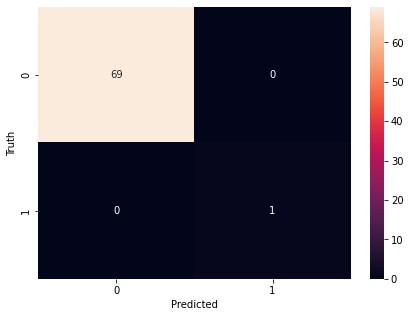

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
features =['Category','Rating','Reviews','Installs','Size']
x=df_cpy[features]
y= df_cpy['Type']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=1)


In [ ]:
len(x_test)
len(y_test)

70

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4 , metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [ ]:
knn.score(x_test,y_test)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
y_predict=knn.predict(x_test)
cm=confusion_matrix(y_test,y_predict)
cm

array([[69,  0],
       [ 0,  1]])

Text(42.0, 0.5, 'Truth')

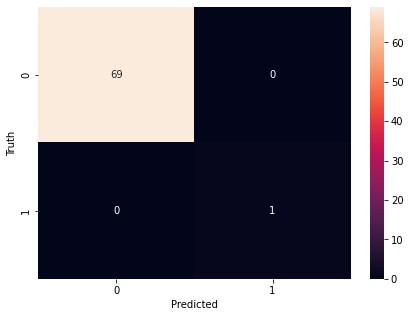

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
features =['Category','Rating','Reviews','Installs','Size']
target =['Type']


In [ ]:
features_train, features_test, target_train, target_test = train_test_split(df_cpy[features],
df_cpy[target],
test_size = 0.33,
random_state = 54)
model = GaussianNB()
model.fit(features_train, target_train)
pred = model.predict(features_test)
accuracy = accuracy_score(target_test, pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pred

array(['0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0',
       '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0',
       '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0',
       '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0'], dtype='<U1')

In [ ]:
accuracy

0.6173913043478261

KNN achieved an accuracy score of: 1

and Bayes achived an accuarcy score of: 61.7

K-MEANS


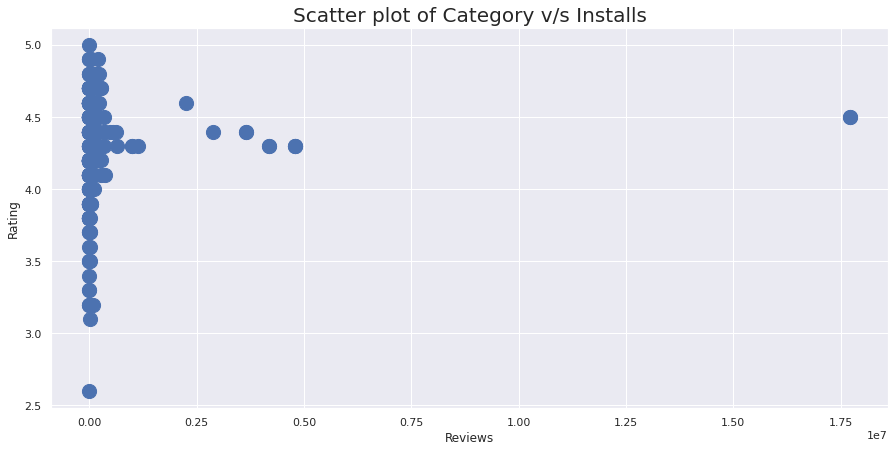

In [ ]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Category v/s Installs', fontsize = 20)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.scatter( x = 'Reviews', y = 'Rating', data = x, s = 200)
plt.show()

Finding number of clusters

In [ ]:
kmeans=KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
clusters=x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

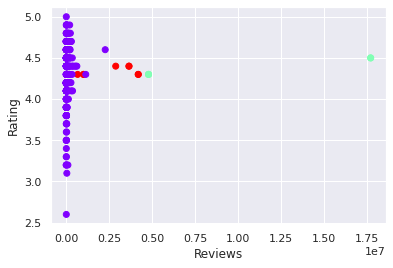

In [ ]:
plt.scatter(clusters['Reviews'],clusters['Rating'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel("Reviews")
plt.ylabel("Rating")
plt.show()

In [ ]:
wcss=[]
for i in range(1,30):
  kmeans=KMeans(i)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
wcss

[1.2951602460387837e+18,
 8.490969084287998e+16,
 8720440301369270.0,
 3258667625126941.5,
 668658909445827.2,
 268264585888261.97,
 67706936985372.22,
 27214426742011.715,
 12288060403950.4,
 6426025036622.766,
 3345178122404.301,
 2437644742490.4717,
 1664766225396.4746,
 1260775812216.7332,
 861525082586.5278,
 648562275568.7227,
 527022845388.0185,
 382513798918.83606,
 291426355020.5242,
 213855181340.62262,
 161855068945.91833,
 140544741451.06934,
 114084639985.65253,
 93266504799.86877,
 73235708042.48308,
 56519643090.18118,
 44303767788.103264,
 33098613385.38891,
 26691335760.126743]

Elbow method is used to identify the best suitable number of clusters for the K-Means clustering . We will plot a graph with x-axis as Number of clusters and Y axis as WCSS value. By analysing the plot we can identify the best number of cluster for K- Means clustering.

Text(0, 0.5, 'WCSS')

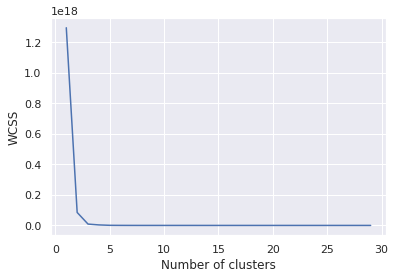

In [ ]:
plt.plot(range(1,30),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

Hierarchical Clustering

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

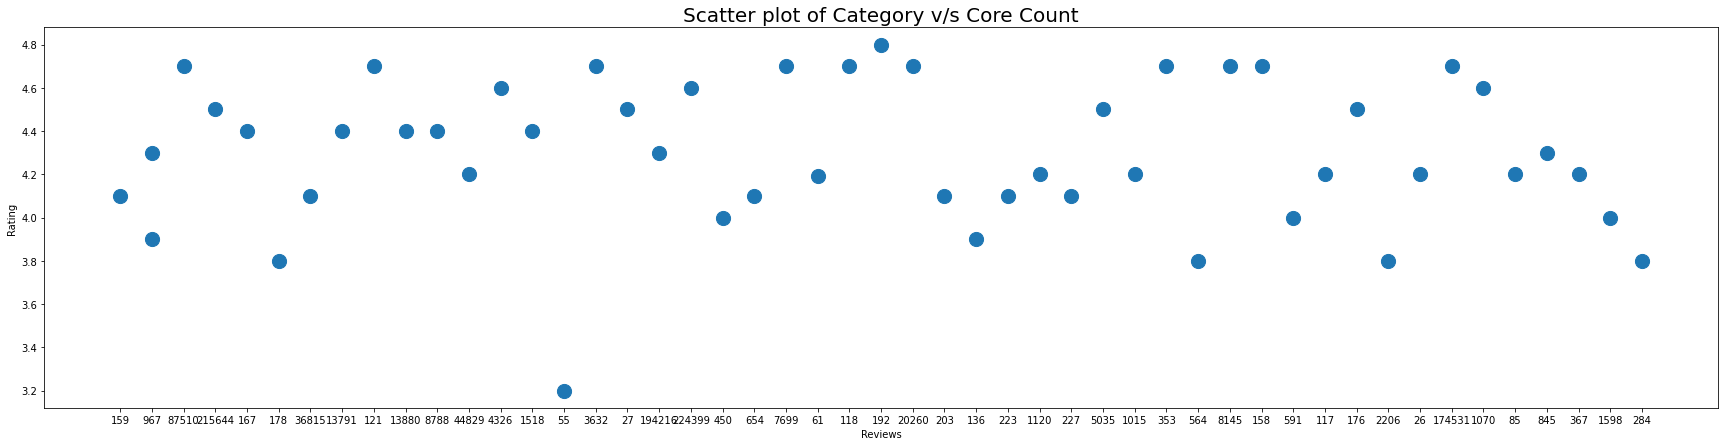

In [ ]:
plt.figure(1 , figsize = (30 , 7))
plt.title('Scatter plot of Category v/s Core Count', fontsize = 20)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.scatter( x = 'Reviews', y = 'Rating', data = df_cpy, s = 200)
plt.show()

Dendrogram is a tree like diagram that shows the hierarchical relationship between the observations. It contains the memory of hierarchical clustering algorithms. Just by looking at the Dendrogram you can tell how the cluster is formed. Let see how to form the dendrogram for the below data points

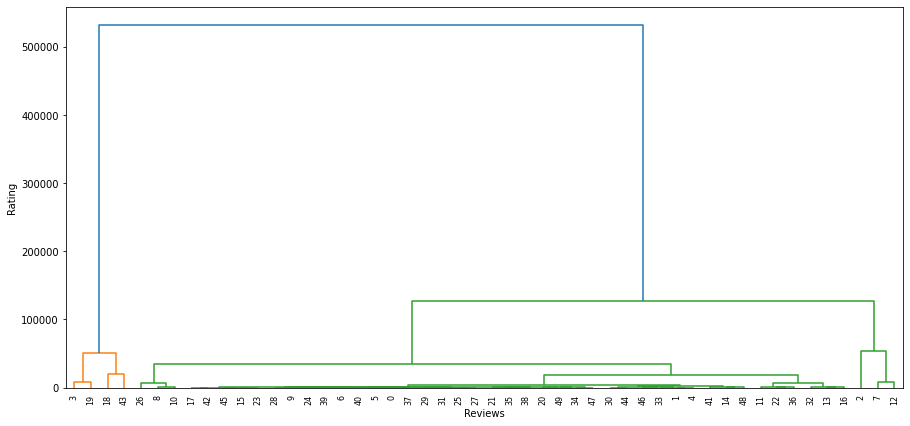

In [ ]:
plt.figure(1 , figsize = (15 , 7))
data = list(zip(df_cpy['Rating'], df_cpy['Reviews']))
plt.xlabel('Reviews')
plt.ylabel('Rating')
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


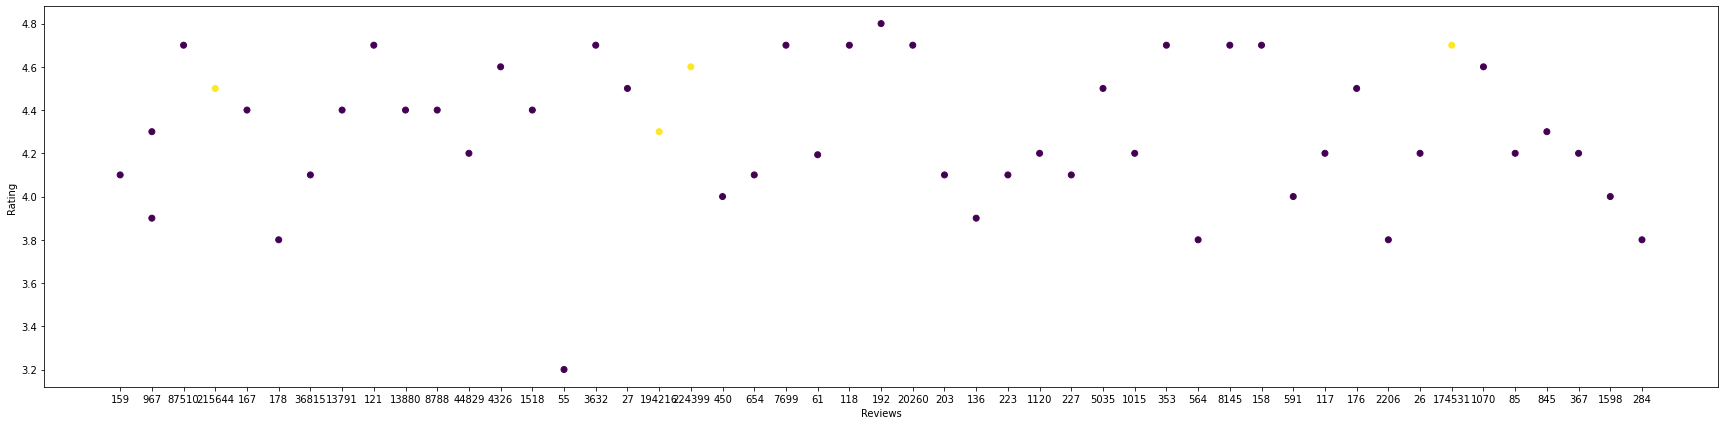

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
data = list(zip(df_cpy['Reviews'],df_cpy['Rating']))
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)
plt.figure(1 , figsize = (30 , 7))
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.scatter(df_cpy['Reviews'], df_cpy['Rating'], c=labels)
plt.show()

###############Using Python's scikit-learn library##############

This is the same for hierarchichal clustering using scikit_learn library

In [ ]:
x=df_cpy['Size']
y=df_cpy['Rating']
data = list(zip(x, y))
print(data)

[(19.0, 4.1), (14.0, 3.9), (8.7, 4.7), (25.0, 4.5), (2.8, 4.3), (5.6, 4.4), (19.0, 3.8), (29.0, 4.1), (33.0, 4.4), (3.1, 4.7), (28.0, 4.4), (12.0, 4.4), (20.0, 4.2), (21.0, 4.6), (37.0, 4.4), (2.7, 3.2), (5.5, 4.7), (17.0, 4.5), (39.0, 4.3), (31.0, 4.6), (14.0, 4.0), (12.0, 4.1), (4.2, 4.7), (7.0, 4.193338315362443), (23.0, 4.7), (6.0, 4.8), (25.0, 4.7), (6.1, 4.1), (4.6, 3.9), (4.2, 4.1), (9.2, 4.2), (5.2, 4.1), (11.0, 4.5), (11.0, 4.2), (4.2, 4.7), (9.2, 3.8), (24.0, 4.7), (11.0, 4.7), (9.4, 4.0), (15.0, 4.2), (10.0, 4.5), (1.2, 3.8), (12.0, 4.2), (24.0, 4.7), (26.0, 4.6), (8.0, 4.2), (7.9, 4.3), (25.0, 4.2), (56.0, 4.0), (57.0, 3.8)]


In [ ]:
linkage_data = linkage(data, method='ward', metric='euclidean')

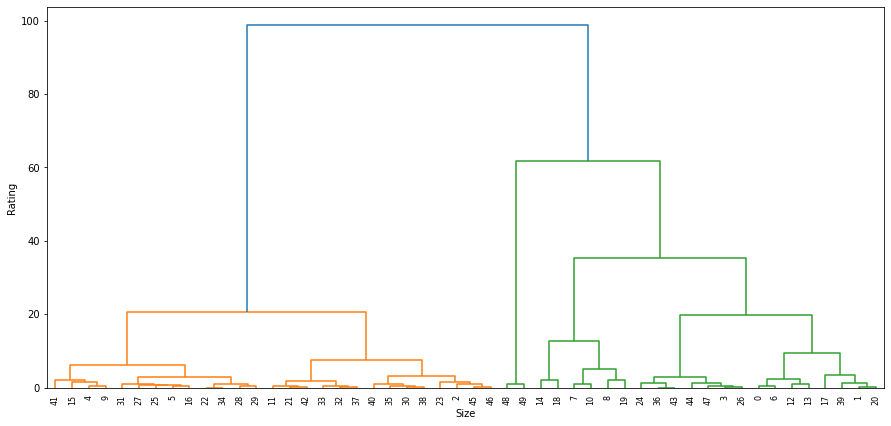

In [ ]:
plt.figure(1 , figsize = (15 , 7))
plt.xlabel('Size')
plt.ylabel('Rating')
dendrogram(linkage_data)
plt.show()

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [ ]:
labels = hierarchical_cluster.fit_predict(data) 
print(labels)

[0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 0 0 1 1 0 0 0]


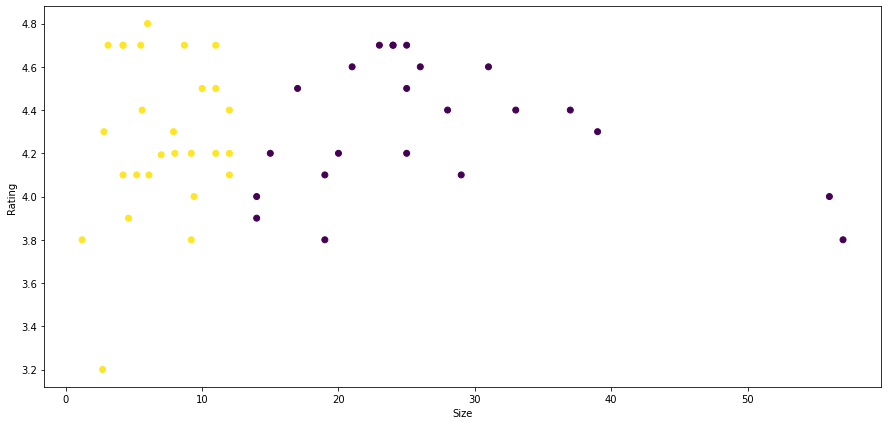

In [ ]:
plt.figure(1 , figsize = (15 , 7))
plt.xlabel('Size')
plt.ylabel('Rating')
plt.scatter(x, y, c=labels)
plt.show()

Decision Tree


In [ ]:
features=['Rating','Reviews','Installs','Size','Type']
target =['Category']

# Function to split the dataset
def splitdataset(balance_data):
  
    # Separating the target variable
    X = balance_data.values[features]
    Y = balance_data.values[target]
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test
 

In [ ]:
features =['Rating','Reviews','Installs','Size','Type']
x=balance_data[features]
y= balance_data['Category']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=100)


In [ ]:
     
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      


In [ ]:
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  


In [ ]:
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      


In [ ]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
  

A decision tree is a very specific type of probability tree that enables you to make a decision about some kind of process.

In [ ]:

# Driver code
def main():
      
    
    clf_gini = train_using_gini(x_train, x_test, y_train)
    clf_entropy = tarin_using_entropy(x_train, x_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(x_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(x_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()


Results Using Gini Index:
Predicted values:
[6 6 6 0 6 5 0 4 4 0 0 0 5 0 4 4 4 4 0 0 4 0 4 6 4 6 5 0 4 0 4 6 0 5 0 0 5
 4 0 6 6 0 0 4 4 6 0 5 6 6 5 4 6 0 0 0 4 6 4 0 4 5 4 2 5 6 6 0 4 4 6 0 6 2
 5 5 4 6 0 0 6 4 4 4 0 4 6 6 6 0 4 6 5 4 0 6 0 6 6 4 6 4 5 0]
Confusion Matrix:  [[ 6  0  1  0  5  3  2  0]
 [ 9  0  0  0  2  1  0  0]
 [ 3  0  0  0  2  3  0  0]
 [ 5  0  0  0  2  2  0  0]
 [ 6  0  0  0  6  2  7  0]
 [ 2  0  1  0  4  1  4  0]
 [ 0  0  0  0  7  0 15  0]
 [ 0  0  0  0  2  1  0  0]]
Accuracy :  26.923076923076923
Report :                precision    recall  f1-score   support

           0       0.19      0.35      0.25        17
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         9
           4       0.20      0.29      0.24        21
           5       0.08      0.08      0.08        12
           6       0.54      0.68      0.60        22
           7       0.00      0.00 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

LOGISTIC REGRESSION

 Logistic regression is an example of supervised learning. It is used to calculate or predict the probability of a binary (yes/no) event occurring.

In [ ]:
cols=['Rating','Reviews','Installs','Size','Type']
target=['Category']
X=df[cols]
Y=df[target]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.17


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 5  0  0  0  1  0  5  0]
 [ 6  0  0  0  1  0  9  0]
 [ 5  0  0  0  1  0  7  0]
 [ 6  0  0  0  1  0  5  0]
 [ 3  0  0  0  1  0 20  0]
 [ 2  0  0  0  0  0  9  0]
 [ 1  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  4  0]]


MLP USING DIFFERENT ACTIVATION FUNCTION

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification


Here i have used 3 different activation function RELU,TANH, and LOGISTIC 

RELU

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 27.97402524
Iteration 2, loss = 31.15322175
Iteration 3, loss = 28.34638660
Iteration 4, loss = 27.61327660
Iteration 5, loss = 27.75617415
Iteration 6, loss = 27.74416609
Iteration 7, loss = 27.72144026
Iteration 8, loss = 27.69727871
Iteration 9, loss = 27.66784665
Iteration 10, loss = 27.63601091
Iteration 11, loss = 27.48664590
Iteration 12, loss = 28.19554811
Iteration 13, loss = 31.71333167
Iteration 14, loss = 27.38898429
Iteration 15, loss = 29.51814397
Iteration 16, loss = 27.24738707
Iteration 17, loss = 27.47352448
Iteration 18, loss = 27.49331710
Iteration 19, loss = 27.68160071
Iteration 20, loss = 30.70547717
Iteration 21, loss = 27.50430344
Iteration 22, loss = 27.50326604
Iteration 23, loss = 27.50330236
Iteration 24, loss = 27.49950746
Iteration 25, loss = 27.49066482
Iteration 26, loss = 27.48558241
Iteration 27, loss = 27.45110983
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [ ]:
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.125

tanh

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01,
                    activation='tanh')

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 2.33596376
Iteration 2, loss = 2.23926077
Iteration 3, loss = 2.16607903
Iteration 4, loss = 2.10628329
Iteration 5, loss = 2.06882322
Iteration 6, loss = 2.04162878
Iteration 7, loss = 2.03060411
Iteration 8, loss = 2.02622298
Iteration 9, loss = 2.02719578
Iteration 10, loss = 2.02662260
Iteration 11, loss = 2.02460025
Iteration 12, loss = 2.01938209
Iteration 13, loss = 2.01371008
Iteration 14, loss = 2.00771565
Iteration 15, loss = 2.00253325
Iteration 16, loss = 2.00074697
Iteration 17, loss = 2.00060573
Iteration 18, loss = 2.00161456
Iteration 19, loss = 2.00019602
Iteration 20, loss = 1.99836305
Iteration 21, loss = 1.99704940
Iteration 22, loss = 1.99579020
Iteration 23, loss = 1.99521733
Iteration 24, loss = 1.99349477
Iteration 25, loss = 2.03900991
Iteration 26, loss = 2.26146160
Iteration 27, loss = 2.21661925
Iteration 28, loss = 2.16047796
Iteration 29, loss = 2.10153908
Iteration 30, loss = 2.27855922
Iteration 31, loss = 2.26004292
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='tanh', hidden_layer_sizes=(6, 5),
              learning_rate_init=0.01, random_state=5, verbose=True)

In [ ]:
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.125

LOGISTIC

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01,
                    activation='logistic')

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 2.13353755
Iteration 2, loss = 2.10953737
Iteration 3, loss = 2.08965280
Iteration 4, loss = 2.07271913
Iteration 5, loss = 2.05684873
Iteration 6, loss = 2.04456670
Iteration 7, loss = 2.03335621
Iteration 8, loss = 2.02304518
Iteration 9, loss = 2.01540641
Iteration 10, loss = 2.00920868
Iteration 11, loss = 2.00462062
Iteration 12, loss = 2.00104145
Iteration 13, loss = 1.99899482
Iteration 14, loss = 1.99699018
Iteration 15, loss = 1.99517748
Iteration 16, loss = 1.99619372
Iteration 17, loss = 1.99573535
Iteration 18, loss = 1.99493548
Iteration 19, loss = 1.99421091
Iteration 20, loss = 1.99404658
Iteration 21, loss = 1.99483118
Iteration 22, loss = 1.99447057
Iteration 23, loss = 1.99445519
Iteration 24, loss = 1.99417900
Iteration 25, loss = 1.99439562
Iteration 26, loss = 1.99477233
Iteration 27, loss = 1.99450054
Iteration 28, loss = 1.99459236
Iteration 29, loss = 1.99456739
Iteration 30, loss = 1.99479603
Iteration 31, loss = 1.99482751
Training loss did

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', hidden_layer_sizes=(6, 5),
              learning_rate_init=0.01, random_state=5, verbose=True)

In [ ]:
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.125